# <font color=pink>**Extração de dados do FMI usando Python**</font>

In [269]:
# Imports
import requests
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt

Referência: https://datahelp.imf.org/knowledgebase/articles/667681-using-json-restful-web-service

In [270]:
# Request para ver a lista de datasets disponíveis na API no FMI
url = "http://dataservices.imf.org/REST/SDMX_JSON.svc/Dataflow"
response = requests.get(url).json()

# Formatando o json
json_formatado = json.dumps(response, indent=4, sort_keys=True)

In [271]:
# Acessando a chave 'Dataflows' para acessar os dados dentro dela
bases = response['Structure']['Dataflows']['Dataflow']

lista_bases = []

# Iterando sobre a lista de bases de dados
for base in bases:
    dataset_info = {
        'ID': base['@id'],
        'Name': base['Name']['#text']
    }
    lista_bases.append(dataset_info)

# Transformando em df
df = pd.DataFrame(lista_bases)

# Filtra o dataset "Financial Access Survey"
df_filtrado = df[df['Name'].str.contains('Financial Access Survey')]
df_filtrado

,ID,Name
52,DS-FAS_2015,"Financial Access Survey (FAS), 2015"
86,DS-FAS_2017,"Financial Access Survey (FAS), 2017"
131,DS-FAS_2016,"Financial Access Survey (FAS), 2016"
175,DS-FAS_2018,"Financial Access Survey (FAS), 2018"
309,DS-FAS,Financial Access Survey (FAS)


In [272]:
# Endpoint da API para ver estrutura de dados do dataset Financial Access Survey (FAS)
database_id = "FAS"
url = f"http://dataservices.imf.org/REST/SDMX_JSON.svc/DataStructure/{database_id}"

# Request
response = requests.get(url).json()

# Formatando json
json_formatado = json.dumps(response, indent=4, sort_keys=True)

In [273]:
# Endpoint da API para acessar os indicadores que vamos usar (referentes às mulheres)
frequency = "A"  # período anual
items_dimension1 = "BR+AE+IN+AR+AO+CV+MZ"  # país Brasil
items_dimension2_F = "FCRAMFHFFA_NUM+FCRODCHFFA_NUM+FCDODCHFFA_NUM+FCAODCHFFA_NUM+FCNAMFHFFA_NUM+FCNODCHFFA_NUM+FCRODCHF_PE_NUM+FCROFNMFHF_NUM+FCDODCHF_PE_NUM"  # indicadores
url = f"http://dataservices.imf.org/REST/SDMX_JSON.svc/CompactData/{database_id}/{frequency}.{items_dimension1}.{items_dimension2_F}"

# Request
response = requests.get(url).json()

# Formatando json
json_formatado = json.dumps(response, indent=4, sort_keys=True)

In [274]:
# Acessando a chave 'Series' para acessar a lista de indicadores
indicadores = response['CompactData']['DataSet']['Series']

# Iterando sobre as listas de indicadores
lista_indicadores = []
for indicador in indicadores:
    for obs in indicador['Obs']:
        dataset_info = {
            'Código do indicador': indicador['@INDICATOR'],
            'Localização': indicador['@REF_AREA'],
            'Período': obs.get('@TIME_PERIOD', np.nan),
            'Valor': obs.get('@OBS_VALUE', np.nan)
        }
        lista_indicadores.append(dataset_info)

# Transformando em um df
df1 = pd.DataFrame(lista_indicadores)
df1

,Código do indicador,Localização,Período,Valor
0,FCDODCHF_PE_NUM,AO,2004,69980
1,FCDODCHF_PE_NUM,AO,2005,95642
2,FCDODCHF_PE_NUM,AO,2006,162834
3,FCDODCHF_PE_NUM,AO,2007,284229
4,FCDODCHF_PE_NUM,AO,2008,355057
...,...,...,...,...
315,FCRODCHFFA_NUM,AR,2018,360.743050249196
316,FCRODCHFFA_NUM,AR,2019,361.711998497585
317,FCRODCHFFA_NUM,AR,2020,342.502574376824
318,FCRODCHFFA_NUM,AR,2021,338.026019490744


In [275]:
# Endpoint da API para acessar os indicadores que vamos analisar (referentes aos homens)
items_dimension2_M = "FCROFNMFHM_NUM+FCDODCHM_PE_NUM+FCRAMFHMMA_NUM+FCRODCHMMA_NUM+FCDODCHMMA_NUM+FCAODCHMMA_NUM+FCNAMFHMMA_NUM+FCNODCHMMA_NUM+FCRODCHM_PE_NUM"  # indicadores
url = f"http://dataservices.imf.org/REST/SDMX_JSON.svc/CompactData/{database_id}/{frequency}.{items_dimension1}.{items_dimension2_M}"

# Request
response = requests.get(url).json()

# Acessando a chave 'Series' para acessar a lista de indicadores
indicadores = response['CompactData']['DataSet']['Series']

# Iterando sobre as listas de indicadores
lista_indicadores = []
for indicador in indicadores:
    for obs in indicador['Obs']:
        dataset_info = {
            'Código do indicador': indicador['@INDICATOR'],
            'Localização': indicador['@REF_AREA'],
            'Período': obs.get('@TIME_PERIOD', np.nan),
            'Valor': obs.get('@OBS_VALUE', np.nan)
        }
        lista_indicadores.append(dataset_info)

# Transformando em um df
df2 = pd.DataFrame(lista_indicadores)
df2

,Código do indicador,Localização,Período,Valor
0,FCDODCHM_PE_NUM,AO,2004,195334
1,FCDODCHM_PE_NUM,AO,2005,261491
2,FCDODCHM_PE_NUM,AO,2006,441077
3,FCDODCHM_PE_NUM,AO,2007,716193
4,FCDODCHM_PE_NUM,AO,2008,955641
...,...,...,...,...
315,FCRODCHMMA_NUM,AR,2018,392.380405478328
316,FCRODCHMMA_NUM,AR,2019,388.442798360202
317,FCRODCHMMA_NUM,AR,2020,372.408835227413
318,FCRODCHMMA_NUM,AR,2021,367.15461230128


In [276]:
indicador_nomes = {
    'FCRAMFHFFA_NUM': 'Number of female borrowers of the household sector from all microfinance institutions per 1,000 female adults',
    'FCRAMFHMMA_NUM': 'Number of male borrowers of the household sector from all microfinance institutions per 1,000 male adults',
    'FCRODCHFFA_NUM': 'Number of female borrowers of the household sector from commercial banks per 1,000 female adult',
    'FCRODCHMMA_NUM': 'Number of male borrowers of the household sector from commercial banks per 1,000 male adult',
    'FCDODCHFFA_NUM': 'Number of female depositors of the household sector with commercial banks per 1,000 female adults',
    'FCDODCHMMA_NUM': 'Number of male depositors of the household sector with commercial banks per 1,000 male adults',
    'FCAODCHFFA_NUM': 'Number of women-owned deposit accounts of the household sector with commercial banks per 1,000 female adults',
    'FCAODCHMMA_NUM': 'Number of men-owned deposit accounts of the household sector with commercial banks per 1,000 male adults',
    'FCNAMFHFFA_NUM': 'Number of women-owned loan accounts of the household sector with all microfinance institutions per 1,000 female adults',
    'FCNAMFHMMA_NUM': 'Number of men-owned loan accounts of the household sector with all microfinance institutions per 1,000 male adults',
    'FCNODCHFFA_NUM': 'Number of women-owned loan accounts of the household sector with commercial banks per 1,000 female adults',
    'FCNODCHMMA_NUM': 'Number of men-owned loan accounts of the household sector with commercial banks per 1,000 male adults',
    'FCRODCHF_PE_NUM': 'Number of Borrowers, Commercial banks, of which: household sector borrowers, of which: female borrowers',
    'FCRODCHM_PE_NUM': 'Number of Borrowers, Commercial banks, of which: household sector borrowers, of which: male borrowers',
    'FCROFNMFHF_NUM': 'Non-deposit taking microfinance institutions, of which: household sector borrowers, of which: female borrowers',
    'FCROFNMFHM_NUM': 'Non-deposit taking microfinance institutions, of which: household sector borrowers, of which: male borrowers',
    'FCDODCHF_PE_NUM': 'Commercial banks, of which: household sector depositors, of which: female depositors',
    'FCDODCHM_PE_NUM': 'Commercial banks, of which: household sector depositors, of which: male depositors'
}

# Criando nova coluna com o nome dos indicadores
df1['Nome do Indicador'] = df1['Código do indicador'].map(indicador_nomes)
df2['Nome do Indicador'] = df2['Código do indicador'].map(indicador_nomes)

In [277]:
df = pd.concat([df1,df2], ignore_index=True)
df

,Código do indicador,Localização,Período,Valor,Nome do Indicador
0,FCDODCHF_PE_NUM,AO,2004,69980,"Commercial banks, of which: household sector d..."
1,FCDODCHF_PE_NUM,AO,2005,95642,"Commercial banks, of which: household sector d..."
2,FCDODCHF_PE_NUM,AO,2006,162834,"Commercial banks, of which: household sector d..."
3,FCDODCHF_PE_NUM,AO,2007,284229,"Commercial banks, of which: household sector d..."
4,FCDODCHF_PE_NUM,AO,2008,355057,"Commercial banks, of which: household sector d..."
...,...,...,...,...,...
635,FCRODCHMMA_NUM,AR,2018,392.380405478328,Number of male borrowers of the household sect...
636,FCRODCHMMA_NUM,AR,2019,388.442798360202,Number of male borrowers of the household sect...
637,FCRODCHMMA_NUM,AR,2020,372.408835227413,Number of male borrowers of the household sect...
638,FCRODCHMMA_NUM,AR,2021,367.15461230128,Number of male borrowers of the household sect...


# <font color=pink>**Tratamento e visualização de dados**</font>

In [278]:
df = df[df['Localização'] == "AR"]

In [279]:
df['Valor'] = df['Valor'].astype(float)
df['Período'] = df['Período'].astype(int)
df['Valor'] = df['Valor'].round(2)

C:\Users\maria\AppData\Local\Temp\ipykernel_11604\4178630446.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Valor'] = df['Valor'].astype(float)
C:\Users\maria\AppData\Local\Temp\ipykernel_11604\4178630446.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Período'] = df['Período'].astype(int)
C:\Users\maria\AppData\Local\Temp\ipykernel_11604\4178630446.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

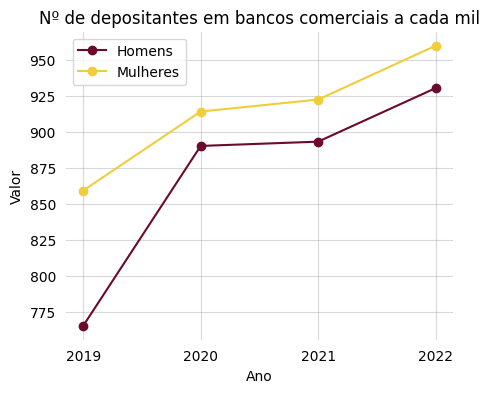

In [280]:
fig, ax = plt.subplots(figsize=(5, 4))

indicador1 = df[df['Código do indicador'] == 'FCDODCHMMA_NUM']
indicador2 = df[df['Código do indicador'] == 'FCDODCHFFA_NUM']

# Homens
plt.plot(indicador1['Período'], indicador1['Valor'], color='#6D092D', label='Homens', marker='o')

# Mulheres
plt.plot(indicador2['Período'], indicador2['Valor'], color='#F1CD3C', label='Mulheres', marker='o')

anos = indicador2['Período'].unique()
plt.grid(True, alpha=0.3, color='gray')

ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.xlabel('Ano', fontsize=10)
plt.ylabel('Valor', fontsize=10)
plt.xticks(anos)
plt.title('Nº de depositantes em bancos comerciais a cada mil')
plt.legend()
plt.show()

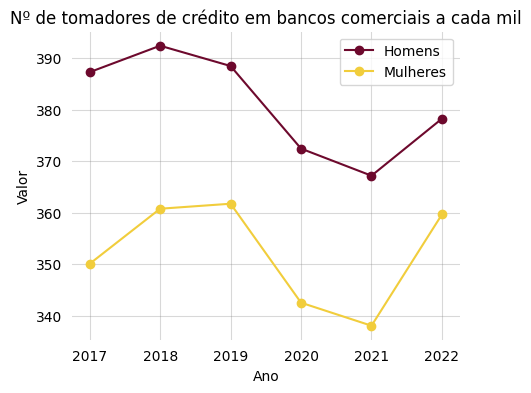

In [281]:
fig, ax = plt.subplots(figsize=(5, 4))

indicador1 = df[df['Código do indicador'] == 'FCRODCHMMA_NUM']
indicador2 = df[df['Código do indicador'] == 'FCRODCHFFA_NUM']

# Homens
plt.plot(indicador1['Período'], indicador1['Valor'], color='#6D092D', label='Homens', marker='o')

# Mulheres
plt.plot(indicador2['Período'], indicador2['Valor'], color='#F1CD3C', label='Mulheres', marker='o')

anos = indicador2['Período'].unique()
plt.grid(True, alpha=0.3, color='gray')

ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.xlabel('Ano', fontsize=10)
plt.ylabel('Valor', fontsize=10)
plt.xticks(anos)
plt.title('Nº de tomadores de crédito em bancos comerciais a cada mil')
plt.legend()
plt.show()